In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime as dt


In [3]:
# Read the dataset into a pandas dataframe
df = pd.read_csv('actions2load.csv')


In [4]:
df.head()


,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [7]:
# Get the shape of the DataFrame
shape = df.shape

# Print the shape
print(shape)

(3242076, 5)


In [5]:
df.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
dtype: int64

In [6]:
# Check for missing data
print(df.isnull().sum())

account_id              0
event_time              0
event_type              0
product_id              0
additional_data    516123
dtype: int64


In [7]:
# Handle missing values
df.fillna(0, inplace=True)

In [8]:
# Check for missing data after handling it
print(df.isnull().sum())

account_id         0
event_time         0
event_type         0
product_id         0
additional_data    0
dtype: int64


In [12]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)


Number of duplicates: 0


In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Get the new shape of the DataFrame after dropping duplicates
shape = df.shape

# Print the shape
print(shape)

(3241562, 5)


In [14]:
# convert the event_time column to a datetime data type
df['event_time'] = pd.to_datetime(df['event_time'])

In [19]:
# extract the date and time from the event_time column
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour

In [19]:
print (df)

                               account_id              event_time  \
0        608aa5969cef2edc29cb0c46deaec9da 2019-11-29 12:10:08.154   
1        d07263602248aa70ce1967d6f98f9506 2019-11-29 12:10:19.962   
2        b7d5902d66127909d0f9d766a841ebb5 2019-11-29 12:11:20.707   
3        d07263602248aa70ce1967d6f98f9506 2019-11-29 12:11:41.283   
4        89f7601cb558e1c47b00a7fabb6a466c 2019-11-29 12:11:58.253   
...                                   ...                     ...   
3242071  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.485   
3242072  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.486   
3242073  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.613   
3242074  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.612   
3242075  3eff5d4b55889abb0a8b08d2136f1b63 2020-06-04 04:20:13.271   

                           event_type  product_id  \
0         DashboardLivebookLinkOpened        1156   
1                    ReadingOwnedBook         610   
2           

In [17]:
print(df.dtypes)

account_id                 object
event_time         datetime64[ns]
event_type                 object
product_id                  int64
additional_data            object
event_date                 object
event_hour                 object
dtype: object


In [20]:
# Convert the event_time column to a datetime object
df["event_time"] = pd.to_datetime(df["event_time"])

df['event_time1'] = df['event_time'].dt.strftime('%H:%M:%S')


# View the result
df.head()


,account_id,event_time,event_type,product_id,additional_data,event_date,event_hour,event_time1
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches,2019-11-29,12,12:10:08
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s,2019-11-29,12,12:10:19
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s,2019-11-29,12,12:11:20
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1,2019-11-29,12,12:11:41
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s,2019-11-29,12,12:11:58


In [25]:
# Get the shape of the DataFrame
shape = df.shape

# Print the shape
print(shape)

(3241562, 8)


In [23]:
df.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248391
event_date             189
event_hour              24
event_time1          86400
dtype: int64

In [26]:
# What events are top ten most common?
most_common_events = df['event_type'].value_counts().head(10)
print('Most common events:')
print(most_common_events)


Most common events:
ReadingOwnedBook                748260
FirstLivebookAccess             658000
FirstManningAccess              657110
EBookDownloaded                 277356
ReadingFreePreview              138197
HighlightCreated                121643
FreeContentCheckout             116144
ReadingOpenChapter              100004
ProductTocLivebookLinkOpened     88126
LivebookLogin                    62484
Name: event_type, dtype: int64


In [27]:
# What 10 events are least common?
least_common_events = df['event_type'].value_counts().tail(10)
print('\nLeast common events:')
print(least_common_events)


Least common events:
GoToManningShoppingCart            4608
ShareableLinkCreated               2746
ShareableLinkOpened                2387
RemoveProductOffering              2163
AddOrUpdateCoupon                  1277
ProductLiveaudioUpsell              838
ProductSeeFreeLinkOpened            163
SherlockHolmesClueFound              10
UnknownOriginLivebookLinkOpened       3
CommentCreated                        1
Name: event_type, dtype: int64


In [28]:
# Get the account id with the highest number of events
account_id_with_max_events = df['account_id'].value_counts().idxmax()
print(f"\nAccount ID with highest number of events: {account_id_with_max_events}")


Account ID with highest number of events: 6bb61e3b7bce0931da574d19d1d82c88


In [29]:
# Get the account id with the least number of events
account_id_with_min_events = df['account_id'].value_counts().idxmin()
print(f"\nAccount ID with lowest number of events: {account_id_with_min_events}")


Account ID with lowest number of events: 760ab383f470f8d8c724dff356dccabd


In [30]:
# Extract the hour timestamp column
df["hour"] = df["event_time"].dt.strftime("%H")

In [21]:
# How many times events occurred based on different times of the day?
df['event_time1'] = pd.to_datetime(df['event_time1'])
#df['hour'] = df['event_time'].dt.hour
event_counts_by_event_time1 = df.groupby('event_time1')['event_type'].count()
print('\nEvent counts by event_time1:')
print(event_counts_by_event_time1)


Event counts by event_time1:
event_time1
2023-04-15 00:00:00    16
2023-04-15 00:00:01    16
2023-04-15 00:00:02    10
2023-04-15 00:00:03    17
2023-04-15 00:00:04     9
                       ..
2023-04-15 23:59:55    32
2023-04-15 23:59:56    22
2023-04-15 23:59:57    26
2023-04-15 23:59:58    29
2023-04-15 23:59:59    15
Name: event_type, Length: 86400, dtype: int64


In [22]:
# How many times events occurred based on different hours of the day?
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour
event_counts_by_hour = df.groupby('hour')['event_type'].count()
print('\nEvent counts by hour:')
print(event_counts_by_hour)


Event counts by hour:
hour
0     124520
1     110440
2     107731
3     102044
4      97862
5     106063
6     116399
7     132769
8     136254
9     140254
10    139032
11    140200
12    152359
13    168837
14    178808
15    175226
16    164140
17    154534
18    149501
19    150497
20    145348
21    135893
22    115747
23     97104
Name: event_type, dtype: int64


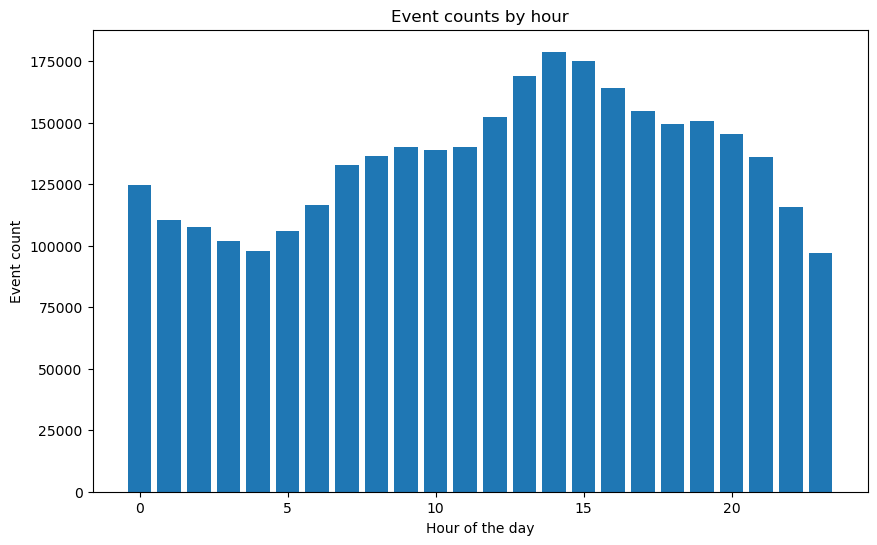

In [35]:
# Visual representation of the count of events by hour
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(event_counts_by_hour.index, event_counts_by_hour.values)
plt.xlabel('Hour of the day')
plt.ylabel('Event count')
plt.title('Event counts by hour')
plt.show()


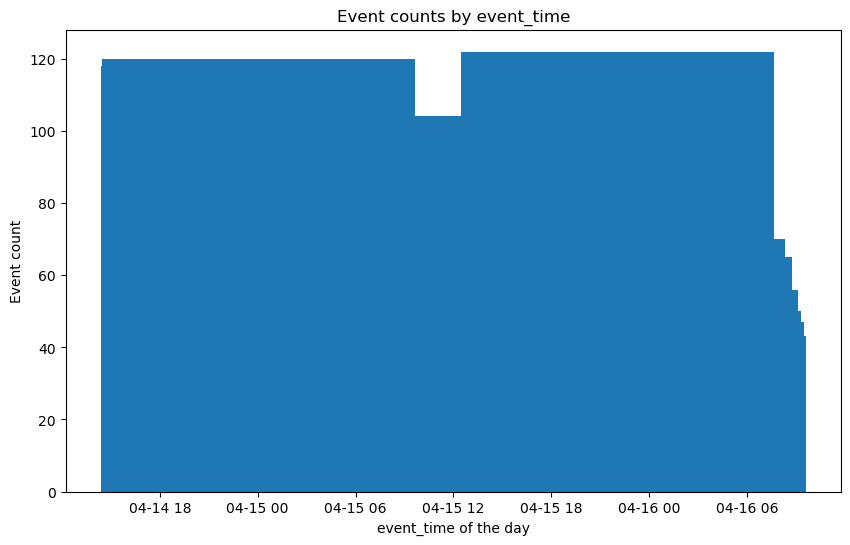

In [23]:
# Visual representation of the count of events by time of the day
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(event_counts_by_event_time1.index, event_counts_by_event_time1.values)
plt.xlabel('event_time of the day')
plt.ylabel('Event count')
plt.title('Event counts by event_time')
plt.show()

In [32]:
# Check for missing data
print(df.isnull().sum())

account_id         0
event_time         0
event_type         0
product_id         0
additional_data    0
event_date         0
event_hour         0
event_time1        0
hour               0
dtype: int64


In [33]:
#Check for class imbalances
event_counts = df['event_type'].value_counts()
print(event_counts)

ReadingOwnedBook                       748260
FirstLivebookAccess                    658000
FirstManningAccess                     657110
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116144
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88126
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34087
SearchMade                              27858
SearchResultOpened                      24225
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8840
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

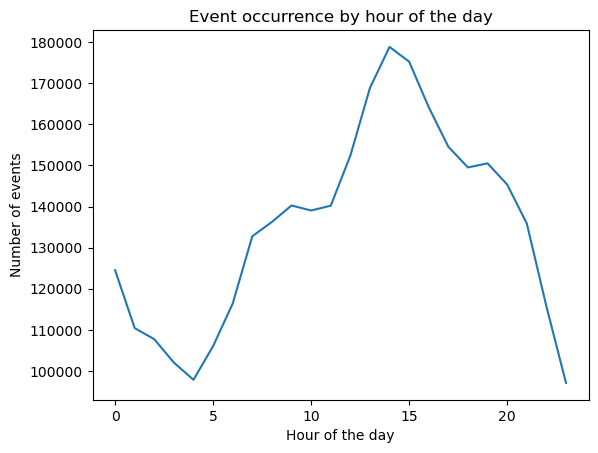

In [36]:
#Check for patterns in event occurrence based on different times of the day
df['event_time'] = pd.to_datetime(df['event_time'])
df['hour'] = df['event_time'].dt.hour
event_counts_by_hour = df.groupby('hour')['event_type'].count()
plt.plot(event_counts_by_hour)
plt.title('Event occurrence by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of events')
plt.show()

In [37]:
# What account id is most active?
Most_active_account_id = df['account_id'].value_counts().head(10)
print('Most active account_id:')
print(Most_active_account_id)

Most active account_id:
6bb61e3b7bce0931da574d19d1d82c88    1371116
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
023f544de40fb3c2ca4157950d64b2bc       4529
caffe2b03e6057845c52212acaaa1a34       4189
c5a4e7e6882845ea7bb4d9462868219b       4090
4f81b1d964419548f01ca35bbaeeda75       3209
3eff5d4b55889abb0a8b08d2136f1b63       2707
Name: account_id, dtype: int64


C:\Users\chioma.egbuagha\AppData\Local\Temp\ipykernel_8408\276595831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_df.loc[:, 'hour'] = account_df['event_time'].dt.hour


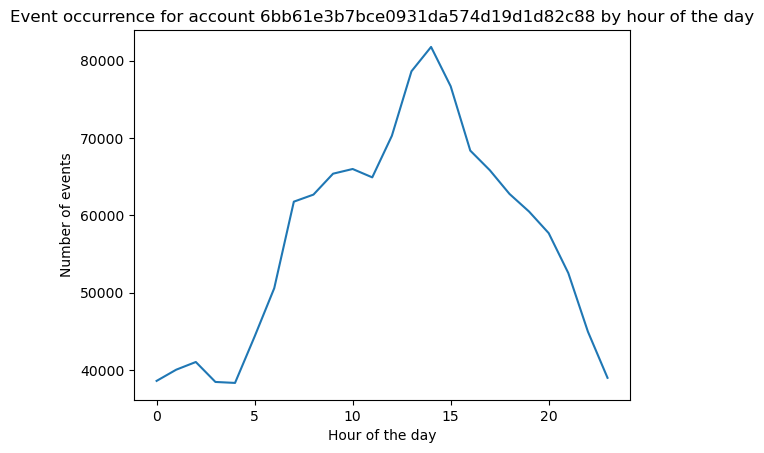

In [61]:
# Analyze a particular account_id for insights on how the person uses the service at different times of the day
account_id = '6bb61e3b7bce0931da574d19d1d82c88'
account_df = df[df['account_id'] == account_id]
#account_df['hour'] = account_df['event_time'].dt.hour
account_df.loc[:, 'hour'] = account_df['event_time'].dt.hour
event_counts_by_hour = account_df.groupby('hour')['event_type'].count()
plt.plot(event_counts_by_hour)
plt.title(f'Event occurrence for account {account_id} by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of events')
plt.show()